In [1]:
use_plaidml = False

if use_plaidml:
    raise NotImplementedError("PlaidML implementation broken")
    import plaidml.keras
    plaidml.keras.install_backend()
    import keras
    import keras.backend as K
else:
    import tensorflow as tf
    import tensorflow.keras as keras
    import tensorflow.keras.backend as K
print(keras.backend.__name__, keras.__version__)

tensorflow.keras.backend 2.2.4-tf


# Pathfinder

In [2]:
from hGRU import hGRUCell, hGRUConv_binary

hGRU using Keras backend: tensorflow_core.keras.backend


In [3]:
from data_generator import DataGenerator_Pathfinder
gen = DataGenerator_Pathfinder("baseline/", batch_size=4)

In [5]:
import numpy as np
model = hGRUConv_binary(conv1_init = np.load("gabor_serre.npy").transpose([2,3,1,0]))
model.compile(optimizer='adam', loss=['binary_crossentropy'])

In [4]:
model.build((None,300,300,1))
model.load_weights("model.h5")

In [6]:
train_history = model.fit_generator(gen, epochs=2)

Epoch 1/2
     9/124992 [..............................] - ETA: 210:17:55 - loss: 0.6936

KeyboardInterrupt: 

In [ ]:
model.summary()
model.save_weights("model_e2.h5")

In [ ]:
import pickle
pickle.dump(train_history.history, open("history_e2.pkl","wb"))

In [15]:
import os
import numpy as np
import imageio
X_test = np.empty((0,300,300,1))
X_path = "baseline/curv_baseline_neg/imgs/4/"
for i, f in enumerate(os.listdir(X_path)):
    print("{}/{}".format(i, len(os.listdir(X_path))), end='\r')
    X_test = np.vstack((X_test, imageio.imread(X_path+f).reshape(1,300,300,1)))
    if i > 10: break
X_test.shape

(12, 300, 300, 1)

In [16]:
print(model.predict(X_test))
# import matplotlib.pyplot as plt
# for x in X_test:
#     plt.imshow(x.squeeze())
#     plt.show()

[[0.49412945 0.5058705 ]
 [0.49412945 0.5058705 ]
 [0.49412945 0.5058705 ]
 [0.49412945 0.5058705 ]
 [0.49412945 0.5058705 ]
 [0.49412945 0.5058705 ]
 [0.49412945 0.5058705 ]
 [0.49412945 0.5058705 ]
 [0.49412945 0.5058705 ]
 [0.49412945 0.5058705 ]
 [0.49412945 0.5058705 ]
 [0.49412945 0.5058705 ]]


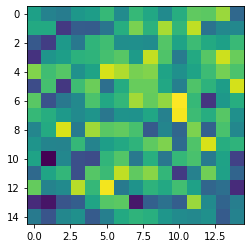

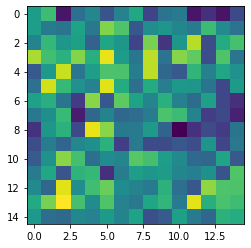

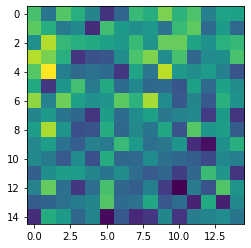

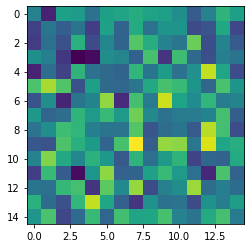

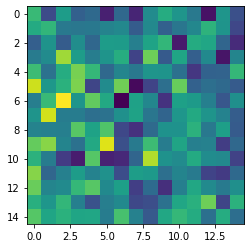

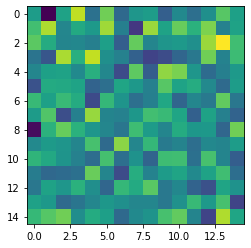

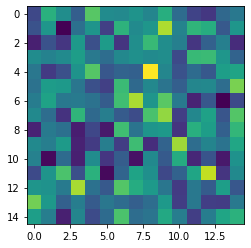

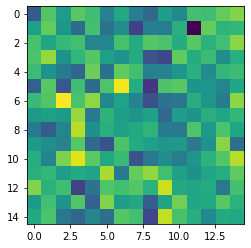

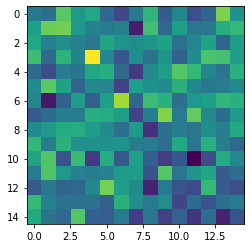

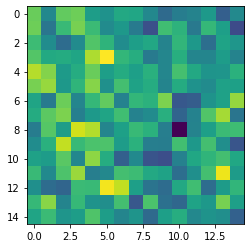

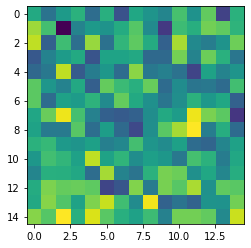

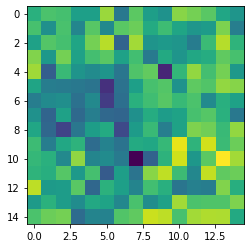

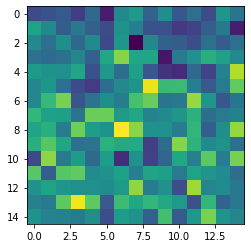

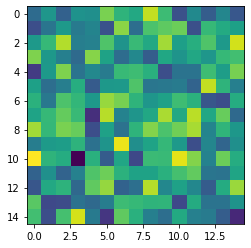

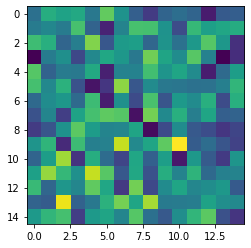

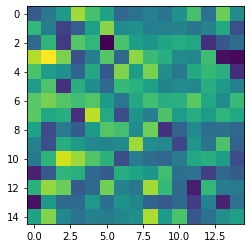

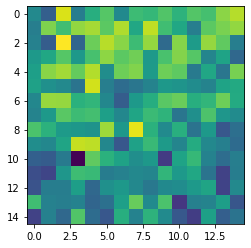

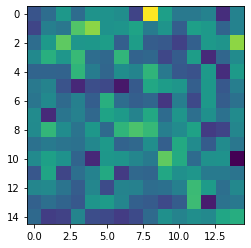

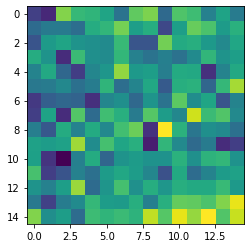

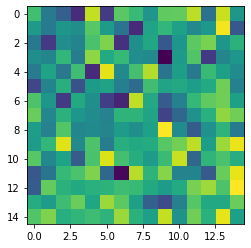

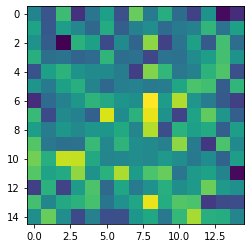

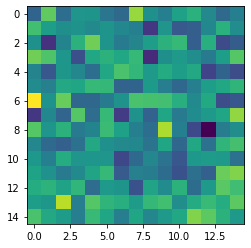

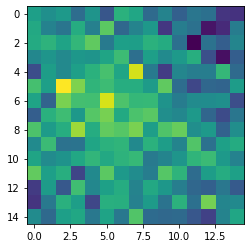

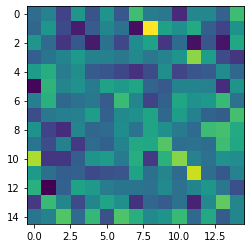

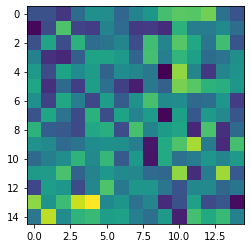

In [36]:
import matplotlib.pyplot as plt
for i in range(25):
    plt.imshow(model.layers[1].weights[4][:,:,0,i])
    plt.show()

# BSDS500

In [1]:
from data_generator import data_generator_BSDS
gen = data_generator_BSDS("BSR/BSDS500/data/images/train/","BSR/BSDS500/data/groundTruth/train/")

In [2]:
from hGRU import hGRUConv_segment
model = hGRUConv_segment()
model.compile(optimizer='adam', loss=['binary_crossentropy'])
model.fit_generator(gen, epochs=1, steps_per_epoch=20)

hGRU using Keras backend: tensorflow.keras.backend
20/20 [==============================] - 364s 18s/step - loss: 0.2429


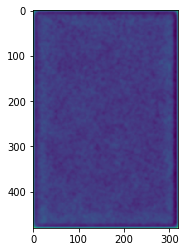

In [6]:
x,y = next(gen)
import matplotlib.pyplot as plt
plt.imshow(model.predict(x)[0].squeeze())
plt.show()